## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata.head()
study_results.head()

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mice_count = len(merge_df['Mouse ID'].unique())
mice_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merge_df[merge_df.duplicated()]
duplicate_mice


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [4]:
merge_df_new = merge_df[['Mouse ID','Timepoint','Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
                                 'Tumor Volume (mm3)', 'Metastatic Sites']]
merge_df_new

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,k403,0,Ramicane,Male,21,16,45.000000,0
1,k403,5,Ramicane,Male,21,16,38.825898,0
2,k403,10,Ramicane,Male,21,16,35.014271,1
3,k403,15,Ramicane,Male,21,16,34.223992,1
4,k403,20,Ramicane,Male,21,16,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,25,Naftisol,Male,9,30,63.145652,2
1889,z969,30,Naftisol,Male,9,30,65.841013,3
1890,z969,35,Naftisol,Male,9,30,69.176246,4
1891,z969,40,Naftisol,Male,9,30,70.314904,4


In [5]:
merge_df_new.columns

Index(['Mouse ID', 'Timepoint', 'Drug Regimen', 'Sex', 'Age_months',
       'Weight (g)', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [6]:
merge_df['Mouse ID'].dtype

dtype('O')

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mice_list = merge_df.loc[(merge_df['Mouse ID'] == 'g989'),:]
duplicate_mice_list

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df_new.drop(merge_df_new[merge_df_new['Mouse ID'] == 'g989'].index, inplace=False)
clean_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,k403,0,Ramicane,Male,21,16,45.000000,0
1,k403,5,Ramicane,Male,21,16,38.825898,0
2,k403,10,Ramicane,Male,21,16,35.014271,1
3,k403,15,Ramicane,Male,21,16,34.223992,1
4,k403,20,Ramicane,Male,21,16,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,25,Naftisol,Male,9,30,63.145652,2
1889,z969,30,Naftisol,Male,9,30,65.841013,3
1890,z969,35,Naftisol,Male,9,30,69.176246,4
1891,z969,40,Naftisol,Male,9,30,70.314904,4


In [9]:
# Checking the number of mice in the clean DataFrame.
clean_df_mice = len(clean_df['Mouse ID'].unique())
clean_df_mice

248

In [10]:
#Print the unique mouse ID from the cleaned DataFrame.
clean_df['Mouse ID'].unique()

array(['k403', 's185', 'x401', 'm601', 'g791', 's508', 'f966', 'm546',
       'z578', 'j913', 'u364', 'n364', 'y793', 'r554', 'm957', 'c758',
       't565', 'a644', 'i177', 'j989', 'i738', 'a520', 'w914', 'r811',
       'g288', 'i334', 'q610', 'd251', 'l897', 'c458', 'b742', 'b128',
       'j246', 'a411', 'j119', 'w150', 'v923', 'g316', 's710', 'l509',
       'r944', 'e662', 'u196', 'q597', 'a444', 'i557', 'r921', 'w678',
       'y449', 'a203', 'a251', 'a262', 'a275', 'a366', 'a401', 'a457',
       'a492', 'a577', 'a685', 'a699', 'a788', 'a818', 'a897', 'a963',
       'b313', 'b447', 'b487', 'b559', 'b759', 'b879', 'c139', 'c264',
       'c282', 'c302', 'c326', 'c402', 'c559', 'c580', 'c757', 'c766',
       'c819', 'c832', 'c895', 'c927', 'd133', 'd164', 'd474', 'e213',
       'e227', 'e291', 'e476', 'e584', 'f129', 'f234', 'f278', 'f345',
       'f394', 'f436', 'f545', 'f932', 'f993', 'g107', 'g296', 'g497',
       'g558', 'g570', 'g867', 'h246', 'h333', 'h428', 'h531', 'i386',
      

In [11]:
#Print the unique drug regimen from the cleaned DataFrame.
clean_df['Drug Regimen'].unique()

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [151]:
#Export the clean DataFrame to a cvs file
clean_df.to_csv("data/Output/1_clean source data.csv", index=False, header=True)

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



In [13]:
# Create a subset of database containing Mouse ID, Tumor Volume(mm3), and Drug Region
# create a list of the columns 
columns = ['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']

# create a new df for the mouse ID with the columns
drug_region_df = clean_df.loc[:,columns]
drug_region_df

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,k403,Ramicane,45.000000
1,k403,Ramicane,38.825898
2,k403,Ramicane,35.014271
3,k403,Ramicane,34.223992
4,k403,Ramicane,32.997729
...,...,...,...
1888,z969,Naftisol,63.145652
1889,z969,Naftisol,65.841013
1890,z969,Naftisol,69.176246
1891,z969,Naftisol,70.314904


In [14]:
#Create a summary statistics table - stat1
drug_region_dfstat1 = drug_region_df.groupby(['Drug Regimen']).describe()
drug_region_dfstat1
#drug_region_dfstat1.columns

Tumor Volume (mm3)                                             \
                          count       mean       std        min        25%   
Drug Regimen                                                                 
Capomulin                 230.0  40.675741  4.994774  23.343598  37.685933   
Ceftamin                  178.0  52.591172  6.268188  45.000000  47.208427   
Infubinol                 178.0  52.884795  6.567243  36.321346  47.312353   
Ketapril                  188.0  55.235638  8.279709  45.000000  48.232987   
Naftisol                  186.0  54.331565  8.134708  45.000000  47.285874   
Placebo                   181.0  54.033581  7.821003  45.000000  47.459053   
Propriva                  148.0  52.320930  6.622085  45.000000  46.894328   
Ramicane                  228.0  40.216745  4.846308  22.050126  36.674635   
Stelasyn                  181.0  54.233149  7.710419  45.000000  48.047139   
Zoniferol                 182.0  53.236507  6.966589  45.000000  47.337876   

                                               
                    50%        75%        max  
Drug Regimen                                   
Capomulin     41.557809  45.000000  48.158209  
Ceftamin      51.776157  56.801438  68.923185  
Infubinol     51.820584  57.314444  72.226731  
Ketapril      53.698743  60.870951  78.567014  
Naftisol      52.509285  59.963034  76.668817  
Placebo       52.288934  59.916934  73.212939  
Propriva      50.446266  56.491585  72.455421  
Ramicane      40.673236  45.000000  47.622816  
Stelasyn      52.431737  58.719297  75.123690  
Zoniferol     51.818479  57.954259  73.324432

In [15]:
columns2 = [('Tumor Volume (mm3)',  'mean'),
            ('Tumor Volume (mm3)',   'std'),
            ('Tumor Volume (mm3)',   '50%')]

drug_region_dfstat11 = drug_region_dfstat1.loc[:,columns2]
drug_region_dfstat11

Tumor Volume (mm3)                     
                           mean       std        50%
Drug Regimen                                        
Capomulin             40.675741  4.994774  41.557809
Ceftamin              52.591172  6.268188  51.776157
Infubinol             52.884795  6.567243  51.820584
Ketapril              55.235638  8.279709  53.698743
Naftisol              54.331565  8.134708  52.509285
Placebo               54.033581  7.821003  52.288934
Propriva              52.320930  6.622085  50.446266
Ramicane              40.216745  4.846308  40.673236
Stelasyn              54.233149  7.710419  52.431737
Zoniferol             53.236507  6.966589  51.818479

In [16]:
#Rename the column names in the stat1 table
#drug_region_dfstat1 = drug_region_dfstat1.rename(columns={"mean":"Tumor Volume Mean","50%":"Tumor Volume Median",
#                                                          "std":"Tumor Volume Std. Dev.",
#"min":"Tumor Volume Min.","max":"Tumor Volume Max.",
#"count":"Tumor Volume Count","25%":"Tumor Volume 25%","75%":"Tumor Volume 75%"})

#drug_region_dfstat1

In [17]:
#Create a statistical table for variance - stat2
drug_region_dfstat2 = drug_region_df.groupby(['Drug Regimen']).var()
drug_region_dfstat2 = drug_region_dfstat2.rename(columns={"Tumor Volume (mm3)":"Tumor Volume Variance"})
drug_region_dfstat2

,Tumor Volume Variance
Drug Regimen,
Capomulin,24.947764
Ceftamin,39.290177
Infubinol,43.128684
Ketapril,68.553577
Naftisol,66.173479
Placebo,61.168083
Propriva,43.852013
Ramicane,23.486704
Stelasyn,59.450562


In [18]:
#Create a statistical table for SEM  - stat3
drug_region_dfstat3 = drug_region_df.groupby(['Drug Regimen']).sem()
drug_region_dfstat3 = drug_region_dfstat3.rename(columns={"Tumor Volume (mm3)":"Tumor Volume SEM"})
drug_region_dfstat3

,Tumor Volume SEM
Drug Regimen,
Capomulin,0.329346
Ceftamin,0.469821
Infubinol,0.492236
Ketapril,0.603860
Naftisol,0.596466
Placebo,0.581331
Propriva,0.544332
Ramicane,0.320955
Stelasyn,0.573111


In [19]:
# Merge Stat1, Stat2, Stat3 to one table
merge_drug_region_dfstat = pd.merge(pd.merge(drug_region_dfstat2, drug_region_dfstat3, on='Drug Regimen'),drug_region_dfstat11,on='Drug Regimen')
merge_drug_region_dfstat = merge_drug_region_dfstat.rename(columns={('Tumor Volume (mm3)', 'mean'):"Tumor Volume Mean",('Tumor Volume (mm3)', '50%'):"Tumor Volume Median",
                                                                    ('Tumor Volume (mm3)', 'std'):"Tumor Volume Std. Dev."})
merge_drug_region_dfstat

C:\Users\yings\AppData\Local\Temp/ipykernel_17468/3182931658.py:2: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left,2 on the right)
  merge_drug_region_dfstat = pd.merge(pd.merge(drug_region_dfstat2, drug_region_dfstat3, on='Drug Regimen'),drug_region_dfstat11,on='Drug Regimen')


,Tumor Volume Variance,Tumor Volume SEM,Tumor Volume Mean,Tumor Volume Std. Dev.,Tumor Volume Median
Drug Regimen,,,,,
Capomulin,24.947764,0.329346,40.675741,4.994774,41.557809
Ceftamin,39.290177,0.469821,52.591172,6.268188,51.776157
Infubinol,43.128684,0.492236,52.884795,6.567243,51.820584
Ketapril,68.553577,0.603860,55.235638,8.279709,53.698743
Naftisol,66.173479,0.596466,54.331565,8.134708,52.509285
Placebo,61.168083,0.581331,54.033581,7.821003,52.288934
Propriva,43.852013,0.544332,52.320930,6.622085,50.446266
Ramicane,23.486704,0.320955,40.216745,4.846308,40.673236
Stelasyn,59.450562,0.573111,54.233149,7.710419,52.431737


In [20]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


In [21]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

#Based on the subset dataframe created that include three columns: Mouse ID, Drug Regimen and Tumor Volume (mm3)
drug_region_df_stat4 = drug_region_df.groupby(['Drug Regimen']).agg(['mean','median','std','var','sem'])
drug_region_df_stat4 = drug_region_df_stat4.rename(columns={"Tumor Volume (mm3)":" ","mean":"Tumor Volume Mean","median":"Tumor Volume Median","std":"Tumor Volume Std. Dev.","var":"Tumor Volume Variance","sem":"Tumor Volume Std. Err."})
drug_region_df_stat4


\
             Tumor Volume Mean Tumor Volume Median Tumor Volume Std. Dev.   
Drug Regimen                                                                
Capomulin            40.675741           41.557809               4.994774   
Ceftamin             52.591172           51.776157               6.268188   
Infubinol            52.884795           51.820584               6.567243   
Ketapril             55.235638           53.698743               8.279709   
Naftisol             54.331565           52.509285               8.134708   
Placebo              54.033581           52.288934               7.821003   
Propriva             52.320930           50.446266               6.622085   
Ramicane             40.216745           40.673236               4.846308   
Stelasyn             54.233149           52.431737               7.710419   
Zoniferol            53.236507           51.818479               6.966589   

                                                           
             Tumor Volume Variance Tumor Volume Std. Err.  
Drug Regimen                                               
Capomulin                24.947764               0.329346  
Ceftamin                 39.290177               0.469821  
Infubinol                43.128684               0.492236  
Ketapril                 68.553577               0.603860  
Naftisol                 66.173479               0.596466  
Placebo                  61.168083               0.581331  
Propriva                 43.852013               0.544332  
Ramicane                 23.486704               0.320955  
Stelasyn                 59.450562               0.573111  
Zoniferol                48.533355               0.516398

## Bar and Pie Charts

In [22]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

import pandas as pd
 

In [23]:
# Create a subset of database containing Mouse ID, Tumor Volume(mm3), and Drug Region
# create a list of the columns 
columns = ['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']

# create a new df for the mouse ID with the columns
drug_region_df = clean_df.loc[:,columns]
drug_region_df

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,k403,Ramicane,45.000000
1,k403,Ramicane,38.825898
2,k403,Ramicane,35.014271
3,k403,Ramicane,34.223992
4,k403,Ramicane,32.997729
...,...,...,...
1888,z969,Naftisol,63.145652
1889,z969,Naftisol,65.841013
1890,z969,Naftisol,69.176246
1891,z969,Naftisol,70.314904


In [24]:
#Summarize the total of timepoint by drug regimen 
#drug_region_df_sum = drug_region_timepoint_df.groupby(['Drug Regimen'])['Mouse ID'].unique()
drug_region_df_sum = drug_region_df.groupby(['Drug Regimen'])['Mouse ID'].count()
drug_region_df_sum

# Checking the number of drug regimen in the clean DataFrame.
#drug_region_timepoint_df['Drug Regimen'].unique()
#drug_region_df_sum['Timepoint'].unique()

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [25]:
# Checking the number of drug regimen in the clean DataFrame.
#drug_region_df_sum['Drug Regimen'].unique()
#drug_region_df_sum.head()

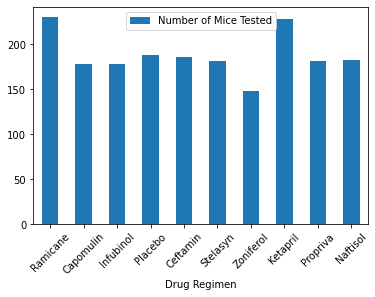

In [26]:
df_bar_plot = pd.DataFrame({'Drug Regimen':['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin','Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
                            'Number of Mice Tested':[230, 178, 178, 188, 186, 181, 148, 228, 181, 182]})
ax = df_bar_plot.plot.bar(x='Drug Regimen', y='Number of Mice Tested', rot=45)


<IPython.core.display.Javascript object>


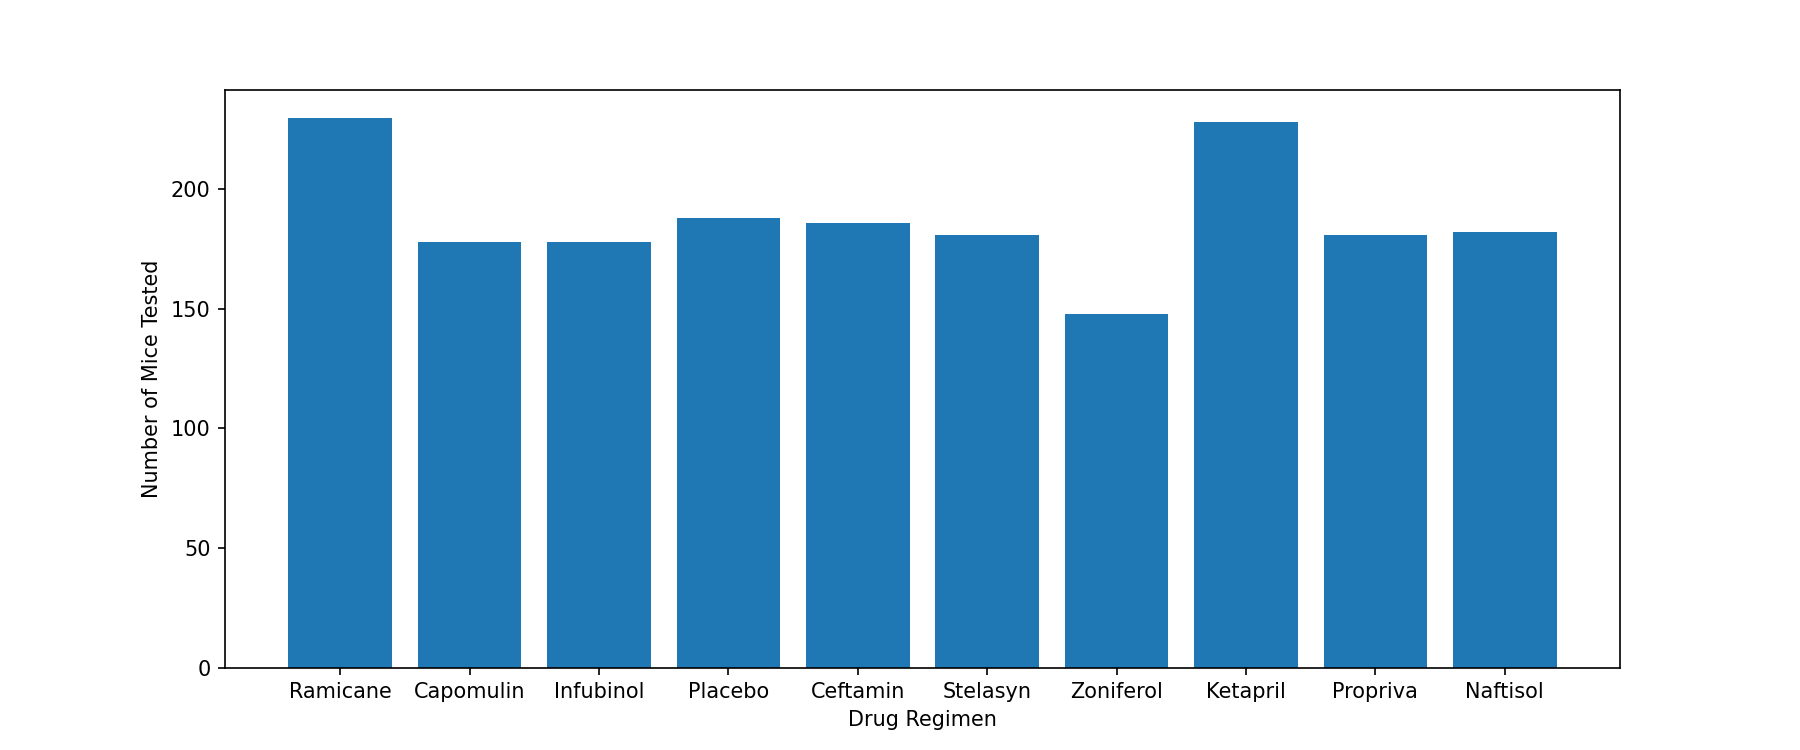

In [27]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

Drug_Regimen = ['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin','Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol']
Number_of_mice_tested = [230, 178, 178, 188, 186, 181, 148, 228, 181, 182]

plt.figure(figsize=(12,5))

plt.bar(Drug_Regimen, Number_of_mice_tested)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
import pandas as pd


In [29]:
# Create a subset of database containing Mouse ID, 
# create a list of the columns 
columns = ['Mouse ID', 'Sex']

# create a new df for the mouse ID with the columns
mice_sex_df = clean_df.loc[:,columns]
mice_sex_df

,Mouse ID,Sex
0,k403,Male
1,k403,Male
2,k403,Male
3,k403,Male
4,k403,Male
...,...,...
1888,z969,Male
1889,z969,Male
1890,z969,Male
1891,z969,Male


In [30]:
mice_sex_df1 = mice_sex_df.groupby(['Sex']).count()
mice_sex_df1


,Mouse ID
Sex,
Female,922
Male,958


In [31]:
# Method 2 - not work
#df_pie_plot = pd.DataFrame.groupby(mice_sex_df['Sex']).count().plot(kind='pie',y = 'sex',index =['Male','Female'])
# pie = df_pie_plot.plot.pie(y ='Number of Mice Tested', figsize=(6,3))

<IPython.core.display.Javascript object>


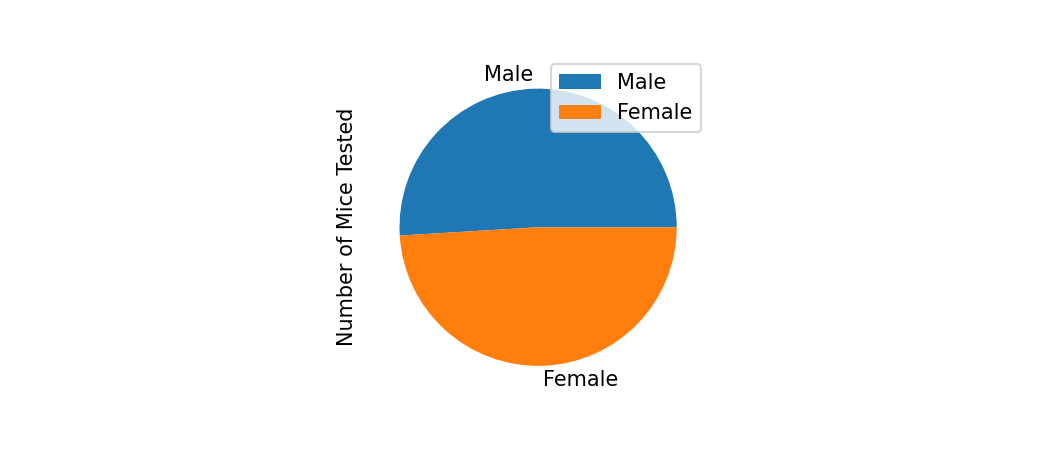

In [32]:
# Method 1 - work -? how to add title and place legend in the upper right corner
df_pie_plot = pd.DataFrame({'Sex':['Male', 'Female'],'Number of Mice Tested':[958,922]},
                          index=['Male', "Female"])
pie = df_pie_plot.plot.pie(y ='Number of Mice Tested',figsize=(7,3))
ax.legend(loc='upper right',bbox_to_anchor=(0.5,0.5))


In [33]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

<IPython.core.display.Javascript object>


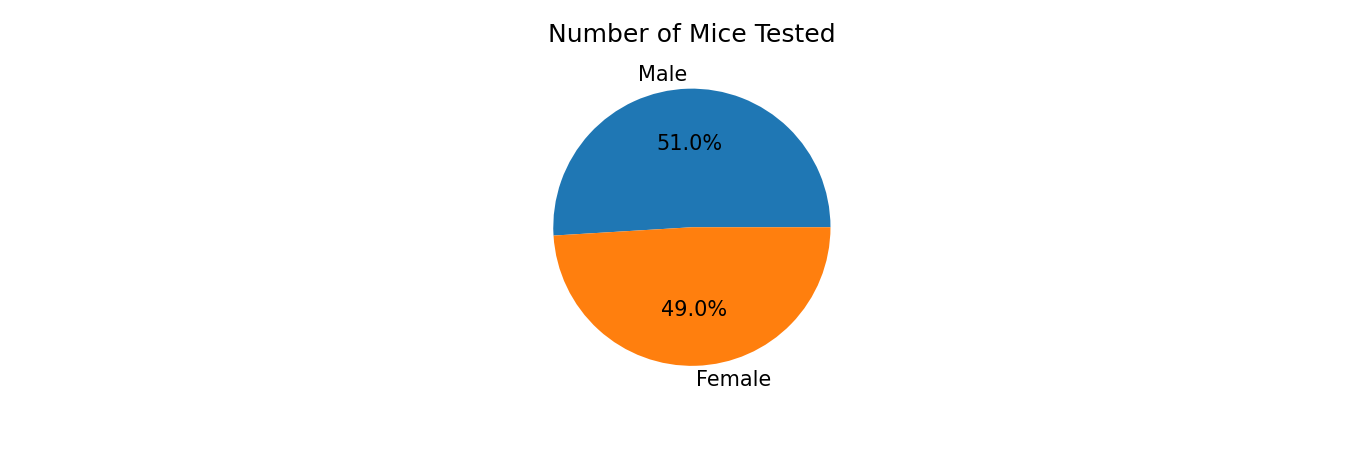

In [34]:
Sex = 'Male', 'Female'
Number_of_mice_tested = [958,922]

plt.figure(figsize=(9,3))

plt.pie(Number_of_mice_tested,labels=Sex,autopct='%1.1f%%')
plt.title("Number of Mice Tested")
plt.show()

In [35]:
clean_df.columns

Index(['Mouse ID', 'Timepoint', 'Drug Regimen', 'Sex', 'Age_months',
       'Weight (g)', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

## Quartiles, Outliers and Boxplots

In [36]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [116]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#Step 1: count by Mouse ID and Drug Regimen for the number of timepoints 
import pandas as pd
#columns1 = ['Mouse ID', 'Drug Regimen','Timepoint', 'Sex','Tumor Volume (mm3)','Age_months', 'Weight (g)', 'Metastatic Sites']
columns1 = ['Mouse ID', 'Drug Regimen']
#columns2 = ['Timepoint', 'Tumor Volume (mm3)']
#clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin',columns1]
Regimen_count = clean_df.groupby(columns1).count()['Timepoint']
#Regimen_count.count() = 248
Regimen_count
#Regimen_count = Regimen_count.rename(columns={'Timepoint':'Number of Timepoints'})
#Regimen_count

Mouse ID  Drug Regimen
a203      Infubinol       10
a251      Infubinol       10
a262      Placebo         10
a275      Ceftamin        10
a366      Stelasyn         7
                          ..
z435      Propriva         3
z578      Ramicane        10
z581      Infubinol       10
z795      Naftisol        10
z969      Naftisol        10
Name: Timepoint, Length: 248, dtype: int64

In [103]:
# Step 2: A) Sort by Mouse ID and Drug Regimen,to find the last timepoint
Regimen_sort_last = clean_df.sort_values(['Mouse ID','Drug Regimen','Timepoint'],ascending=[True, True, False],na_position ='first')
Regimen_sort_last_df = Regimen_sort_last.reset_index(drop=True)
Regimen_sort_last_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a203,40,Infubinol,Female,20,23,63.593490,2
2,a203,35,Infubinol,Female,20,23,61.931650,2
3,a203,30,Infubinol,Female,20,23,59.523197,1
4,a203,25,Infubinol,Female,20,23,56.793208,1
...,...,...,...,...,...,...,...,...
1875,z969,20,Naftisol,Male,9,30,57.898778,2
1876,z969,15,Naftisol,Male,9,30,54.713005,2
1877,z969,10,Naftisol,Male,9,30,52.656081,1
1878,z969,5,Naftisol,Male,9,30,49.332999,0


In [106]:
#Step 2: B) print the first line of records by mouse ID
Regimen_last = Regimen_sort_last_df.groupby(columns1).head(1)
#Regimen4_latest.count()
Regimen_last = Regimen_last.rename(columns = {'Timepoint':'Last Timepoint','Tumor Volume (mm3)':'Last Tumor Volume'})
Regimen_last

,Mouse ID,Last Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Last Tumor Volume,Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
10,a251,45,Infubinol,Female,21,25,65.525743,1
20,a262,45,Placebo,Female,17,29,70.717621,4
30,a275,45,Ceftamin,Female,20,28,62.999356,3
40,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
1837,z435,10,Propriva,Female,12,26,48.710661,0
1840,z578,45,Ramicane,Male,11,16,30.638696,0
1850,z581,45,Infubinol,Female,24,25,62.754451,3
1860,z795,45,Naftisol,Female,13,29,65.741070,3


In [107]:
# Step 3: A) sort by Mouse ID and Drug Regimen,to find the first timepoint
Regimen_sort_first = clean_df.sort_values(['Mouse ID','Drug Regimen','Timepoint'],ascending=[True, True, True],na_position ='first')
Regimen_sort_first_df = Regimen_sort_first.reset_index(drop=True)
Regimen_sort_first_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,0,Infubinol,Female,20,23,45.000000,0
1,a203,5,Infubinol,Female,20,23,48.508468,0
2,a203,10,Infubinol,Female,20,23,51.852437,1
3,a203,15,Infubinol,Female,20,23,52.777870,1
4,a203,20,Infubinol,Female,20,23,55.173336,1
...,...,...,...,...,...,...,...,...
1875,z969,25,Naftisol,Male,9,30,63.145652,2
1876,z969,30,Naftisol,Male,9,30,65.841013,3
1877,z969,35,Naftisol,Male,9,30,69.176246,4
1878,z969,40,Naftisol,Male,9,30,70.314904,4


In [137]:
#Step 3: B) print the first line of records by mouse ID
Regimen_first = Regimen_sort_first_df.groupby(columns1).head(1)
#Regimen4_latest.count()
Regimen_first = Regimen_first.rename(columns = {'Timepoint':'First Timepoint','Tumor Volume (mm3)':'First Tumor Volume'})
Regimen_first

,Mouse ID,First Timepoint,Drug Regimen,Sex,Age_months,Weight (g),First Tumor Volume,Metastatic Sites
0,a203,0,Infubinol,Female,20,23,45.0,0
10,a251,0,Infubinol,Female,21,25,45.0,0
20,a262,0,Placebo,Female,17,29,45.0,0
30,a275,0,Ceftamin,Female,20,28,45.0,0
40,a366,0,Stelasyn,Female,16,29,45.0,0
...,...,...,...,...,...,...,...,...
1837,z435,0,Propriva,Female,12,26,45.0,0
1840,z578,0,Ramicane,Male,11,16,45.0,0
1850,z581,0,Infubinol,Female,24,25,45.0,0
1860,z795,0,Naftisol,Female,13,29,45.0,0


In [138]:
#Step 4: A) Merge three subsets dataframes (count, last timepoint, first timepoint) to one dataframe
merge_regimen_all = pd.merge(pd.merge(Regimen_first,Regimen_last,on=columns1),Regimen_count,on=columns1)
merge_regimen_all = merge_regimen_all.rename(columns={'Timepoint':'Number of Counts','Sex_x':'Sex','Age_months_x':'Age_months','Weight (g)_x':'Weight (g)','Metastatic Sites_x':'Metastatic Sites'})
#merge_regimen_all = merge_regimen_all.loc(subset=['Sex_y','Age_months_y','Weight (g)_y','Metastatic Sites_y'])
merge_regimen_all

,Mouse ID,First Timepoint,Drug Regimen,Sex,Age_months,Weight (g),First Tumor Volume,Metastatic Sites,Last Timepoint,Sex_y,Age_months_y,Weight (g)_y,Last Tumor Volume,Metastatic Sites_y,Number of Counts
0,a203,0,Infubinol,Female,20,23,45.0,0,45,Female,20,23,67.973419,2,10
1,a251,0,Infubinol,Female,21,25,45.0,0,45,Female,21,25,65.525743,1,10
2,a262,0,Placebo,Female,17,29,45.0,0,45,Female,17,29,70.717621,4,10
3,a275,0,Ceftamin,Female,20,28,45.0,0,45,Female,20,28,62.999356,3,10
4,a366,0,Stelasyn,Female,16,29,45.0,0,30,Female,16,29,63.440686,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,z435,0,Propriva,Female,12,26,45.0,0,10,Female,12,26,48.710661,0,3
244,z578,0,Ramicane,Male,11,16,45.0,0,45,Male,11,16,30.638696,0,10
245,z581,0,Infubinol,Female,24,25,45.0,0,45,Female,24,25,62.754451,3,10
246,z795,0,Naftisol,Female,13,29,45.0,0,45,Female,13,29,65.741070,3,10


In [140]:
#Step 4: A) Clean the columns by droping off the duplicate columns
columns2 = ['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months','Number of Counts',
       'Weight (g)', 'First Timepoint', 'First Tumor Volume', 'Metastatic Sites',
       'Last Timepoint','Last Tumor Volume']
merge_regimen_all = merge_regimen_all.loc[:,columns2]
merge_regimen_all

,Mouse ID,Drug Regimen,Sex,Age_months,Number of Counts,Weight (g),First Timepoint,First Tumor Volume,Metastatic Sites,Last Timepoint,Last Tumor Volume
0,a203,Infubinol,Female,20,10,23,0,45.0,0,45,67.973419
1,a251,Infubinol,Female,21,10,25,0,45.0,0,45,65.525743
2,a262,Placebo,Female,17,10,29,0,45.0,0,45,70.717621
3,a275,Ceftamin,Female,20,10,28,0,45.0,0,45,62.999356
4,a366,Stelasyn,Female,16,7,29,0,45.0,0,30,63.440686
...,...,...,...,...,...,...,...,...,...,...,...
243,z435,Propriva,Female,12,3,26,0,45.0,0,10,48.710661
244,z578,Ramicane,Male,11,10,16,0,45.0,0,45,30.638696
245,z581,Infubinol,Female,24,10,25,0,45.0,0,45,62.754451
246,z795,Naftisol,Female,13,10,29,0,45.0,0,45,65.741070


In [143]:
#Step 4: B) Calculate the tumor volume growth = Last tumor volume - first tumor volume
merge_regimen_all['Tumor Volume Diff'] = merge_regimen_all['Last Tumor Volume'] - merge_regimen_all['First Tumor Volume']
merge_regimen_all

,Mouse ID,Drug Regimen,Sex,Age_months,Number of Counts,Weight (g),First Timepoint,First Tumor Volume,Metastatic Sites,Last Timepoint,Last Tumor Volume,Tumor Volume Diff
0,a203,Infubinol,Female,20,10,23,0,45.0,0,45,67.973419,22.973419
1,a251,Infubinol,Female,21,10,25,0,45.0,0,45,65.525743,20.525743
2,a262,Placebo,Female,17,10,29,0,45.0,0,45,70.717621,25.717621
3,a275,Ceftamin,Female,20,10,28,0,45.0,0,45,62.999356,17.999356
4,a366,Stelasyn,Female,16,7,29,0,45.0,0,30,63.440686,18.440686
...,...,...,...,...,...,...,...,...,...,...,...,...
243,z435,Propriva,Female,12,3,26,0,45.0,0,10,48.710661,3.710661
244,z578,Ramicane,Male,11,10,16,0,45.0,0,45,30.638696,-14.361304
245,z581,Infubinol,Female,24,10,25,0,45.0,0,45,62.754451,17.754451
246,z795,Naftisol,Female,13,10,29,0,45.0,0,45,65.741070,20.741070


In [155]:
merge_regimen_all['Drug Regimen'].unique()

array(['Infubinol', 'Placebo', 'Ceftamin', 'Stelasyn', 'Zoniferol',
       'Ramicane', 'Ketapril', 'Propriva', 'Naftisol', 'Capomulin'],
      dtype=object)

In [156]:
merge_regimen_all['Mouse ID'].unique()

array(['a203', 'a251', 'a262', 'a275', 'a366', 'a401', 'a411', 'a444',
       'a457', 'a492', 'a520', 'a577', 'a644', 'a685', 'a699', 'a788',
       'a818', 'a897', 'a963', 'b128', 'b313', 'b447', 'b487', 'b559',
       'b742', 'b759', 'b879', 'c139', 'c264', 'c282', 'c302', 'c326',
       'c402', 'c458', 'c559', 'c580', 'c757', 'c758', 'c766', 'c819',
       'c832', 'c895', 'c927', 'd133', 'd164', 'd251', 'd474', 'e213',
       'e227', 'e291', 'e476', 'e584', 'e662', 'f129', 'f234', 'f278',
       'f345', 'f394', 'f436', 'f545', 'f932', 'f966', 'f993', 'g107',
       'g288', 'g296', 'g316', 'g497', 'g558', 'g570', 'g791', 'g867',
       'h246', 'h333', 'h428', 'h531', 'i177', 'i334', 'i386', 'i477',
       'i557', 'i635', 'i669', 'i738', 'i901', 'j119', 'j235', 'j246',
       'j296', 'j365', 'j755', 'j913', 'j984', 'j989', 'k210', 'k382',
       'k403', 'k483', 'k510', 'k603', 'k754', 'k804', 'k862', 'k894',
       'l215', 'l264', 'l471', 'l490', 'l509', 'l558', 'l661', 'l700',
      

In [147]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

import pandas as pd

#columns1 = ['Mouse ID', 'Drug Regimen','Timepoint', 'Sex','Tumor Volume (mm3)','Age_months', 'Weight (g)', 'Metastatic Sites']
condition1_regimen = (merge_regimen_all['Drug Regimen'] == 'Capomulin')|(merge_regimen_all['Drug Regimen'] =='Ramicane')|(merge_regimen_all['Drug Regimen'] =='Infubinol')|(merge_regimen_all['Drug Regimen'] == 'Ceftamin')

# create data subset1 - Capomulin
four_regimens_df = merge_regimen_all.loc[condition1_regimen,:]
four_regimens_df

,Mouse ID,Drug Regimen,Sex,Age_months,Number of Counts,Weight (g),First Timepoint,First Tumor Volume,Metastatic Sites,Last Timepoint,Last Tumor Volume,Tumor Volume Diff
0,a203,Infubinol,Female,20,10,23,0,45.0,0,45,67.973419,22.973419
1,a251,Infubinol,Female,21,10,25,0,45.0,0,45,65.525743,20.525743
3,a275,Ceftamin,Female,20,10,28,0,45.0,0,45,62.999356,17.999356
6,a411,Ramicane,Male,3,10,22,0,45.0,0,45,38.407618,-6.592382
7,a444,Ramicane,Female,10,10,25,0,45.0,0,45,43.047543,-1.952457
...,...,...,...,...,...,...,...,...,...,...,...,...
238,y769,Ceftamin,Female,6,10,27,0,45.0,0,45,68.594745,23.594745
239,y793,Capomulin,Male,17,10,17,0,45.0,0,45,31.896238,-13.103762
240,y865,Ceftamin,Male,23,10,26,0,45.0,0,45,64.729837,19.729837
244,z578,Ramicane,Male,11,10,16,0,45.0,0,45,30.638696,-14.361304


In [152]:
#Step 4: C) print the final dataset for 4 regimens to a cvs file.
four_regimens_df.to_csv("data/Output/2_four regimens.csv", index=False, header=True)

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
regimen_list = {'Infubinol', 'Placebo', 'Ceftamin', 'Stelasyn', 'Zoniferol',
       'Ramicane', 'Ketapril', 'Propriva', 'Naftisol', 'Capomulin'}

# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


In [ ]:
clean_df.columns

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
